In [2]:
import re, sys,os
import numpy as np
import matplotlib.pyplot as plt
from functools import partial
from matplotlib import colors
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import FormatStrFormatter

In [3]:
mpl.rcParams["font.size"]=12

In [4]:
def getPs(pars,x):
    Kxc,Kpc,wc,Kt,Kxo_factor,Kpo_factor,wo=pars
    Kxo=Kxc*Kxo_factor
    Kpo=Kpc*Kpo_factor
    Z=1+Kxc*x+Kpc+Kxc*Kpc*wc*x+Kt+Kt*Kxo*x+Kt*Kpo+Kt*Kxo*Kpo*wo*x
    P1=1/Z
    P2=Kxc*x/Z
    P3=Kpc/Z
    P4=Kxc*x*Kpc*wc/Z
    P5=Kt/Z
    P6=Kt*Kxo*x/Z
    P7=Kt*Kpo/Z
    P8=Kt*Kxo*Kpo*wo*x/Z
    
    return np.array([P1,P2,P3,P4,P5,P6,P7,P8])

def plot_parset(pars,qs,title=None,widerange=False,color="k",figname=None,returnonly=False,ndec=None,xrange=None,xticks=None):
    q3,q4,q7,q8=qs
    if xrange:
        xvals=np.logspace(xrange[0],xrange[1],100)
    elif not widerange:
        xvals=np.logspace(-1.,1.,200)
    else:
        xvals=np.logspace(-3,3,1000)
    values=np.zeros(len(xvals))
    xval=0
    Ps=getPs(pars,xval)
    expr0=q3*Ps[2]+q4*Ps[3]+q7*Ps[6]+q8*Ps[7] 
    

    for x_,xval in enumerate(xvals):
        
        Ps=getPs(pars,xval)
        expr=q3*Ps[2]+q4*Ps[3]+q7*Ps[6]+q8*Ps[7] 
        values[x_]=expr/expr0
    if not returnonly:
        fig,ax=plt.subplots(1,1,figsize=(1.8,1.35))
        ax.plot(xvals,values,color=color)
        ax.set_xscale('log')
        ax.spines[['right', 'top']].set_visible(False)
        if xticks:
            ax.set_xticks(xticks)
            ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
        ax.set_xlabel(r"$x$")
        ax.set_ylabel('F(x)')
        if ndec==2:
            ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
        ax.axhline(y=1,linestyle="--",color="gray")
        if title is not None:
            ax.set_title(title)
        #plt.tight_layout()
        if figname is not None:
            plt.savefig(figname,bbox_inches="tight")
        plt.show()
    else:
        return values
        
        

In [5]:
Kxc=0.1
Kpc=0.01
beta=50
Kt=0.005
figsfolder="./figscode"
if not os.path.isdir(figsfolder):
    os.mkdir(figsfolder)

$\alpha=0.01,\omega=0.25,\gamma=1$


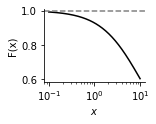

In [5]:
wc=0.25
gamma=1
wo=wc*gamma
alpha=0.01
pars=[Kxc,Kpc,wc,Kt,alpha,beta,wo]
qs=[1,1,1,1]
title=r"$\alpha=%g,\omega=%g,\gamma=%g$"%(alpha,wc,gamma)
print(title)
title=None
plot_parset(pars,qs,title=title,figname=os.path.join(figsfolder,"Fig2Bdown.svg"))

In [6]:
np.exp(-3)

0.049787068367863944

$\alpha=10,\omega=2,\gamma=1$


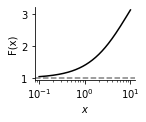

In [7]:
wc=2
gamma=1
wo=wc*gamma
alpha=10
pars=[Kxc,Kpc,wc,Kt,alpha,beta,wo]
qs=[1,1,1,1]
title=r"$\alpha=%g,\omega=%g,\gamma=%g$"%(alpha,wc,gamma)
print(title)
title=None
plot_parset(pars,qs,title=title,figname=os.path.join(figsfolder,"Fig2Bup.svg"))

In [8]:
mpl.rcParams["font.size"]=11

0.2181906144170295 5.696860054065293
0.01


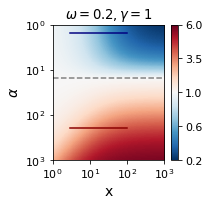

In [9]:
#dual

Kxc=0.05
Kpc=0.01
beta=50
Kt=0.01

wc=0.2
gamma=1
wo=wc*gamma
q3=q4=q7=q8=1

xvals=np.logspace(0,3,100)
alphavals=np.logspace(0,3,100)
out=np.zeros((len(alphavals), len(xvals)))

for b, alpha in enumerate(alphavals):
    pars=[Kxc,Kpc,wc,Kt,alpha,beta,wo] #it doesn't seem to work if factor affects both Kxc and Kxo
    
    xval=0
    Ps=getPs(pars,xval)
    expr0=q3*Ps[2]+q4*Ps[3]+q7*Ps[6]+q8*Ps[7] 

    for x_,xval in enumerate(xvals):
        Ps=getPs(pars,xval)
        expr=q3*Ps[2]+q4*Ps[3]+q7*Ps[6]+q8*Ps[7] 
        out[b,x_]=expr/expr0

min_val_rounded=np.round(out.min(),1) #round minimum value to 1 decimal
max_val_rounded=np.round(out.max(),0) #round max value to 0 decimals
print(out.min(),out.max())
#bGlist=[0.05,1,50]
fig,ax=plt.subplots(1,1,figsize=(3,3)) 
#ar=np.ma.masked_array(out,mask=out<1)
norm=colors.TwoSlopeNorm(vmin=min_val_rounded, vcenter=1., vmax=max_val_rounded)
extent=[np.log10(xvals[0]),np.log10(xvals[-1]),np.log10(alphavals[-1]),np.log10(alphavals[0])]

cmap=plt.cm.RdBu_r

im=ax.imshow(out,origin="upper",norm=norm,cmap=cmap,extent=extent,aspect="auto")
ax.contour(out,origin="upper",extent=extent,levels=[1],linestyles=["--"],colors=["gray"])
ax.set_xticks([0,1,2,3])
ax.set_xticklabels([r"$10^0$",r"$10^1$",r"$10^2$",r"$10^3$"])
ax.set_yticks([0,1,2,3])
ax.set_yticklabels([r"$10^{0}$",r"$10^{1}$",r"$10^{2}$",r"$10^3$"])
colors_lines=["darkred","navy"]
alphavals=[200,1.5]
xrangelplot=[np.log10(3),2]
xticks=[3,100]
for a,alpha in enumerate(alphavals):
#    print(bG)
    ax.plot(xrangelplot,[np.log10(alpha),np.log10(alpha)],linestyle="-",color=colors_lines[a])
#ax.plot([0,0],[-1,1],linestyle=":",color="k")
#ax.plot([1,1],[-1,1],linestyle=":",color="k")
    #ax.axhline(y=np.log10(bG),)
#ax.set_xscale('log')
ax.set_ylabel(r"$\alpha$",size=14)
ax.set_xlabel(r"x",size=14)
print(Kt)
ax.set_title(r"$\omega=%g,\gamma=%g$"%(wc,gamma))

#colorbar bounds: below and above 1 different spacing but uniformly distributed ticks

below_one=np.linspace(min_val_rounded,1,3)
above_one=np.linspace(1,max_val_rounded,3)
bounds=np.concatenate((below_one,above_one[1:]))
cbax=plt.colorbar(im,ax=ax,ticks=bounds)
#cbax.set_label(label="fold change ($F(x)$)",size=14)

#divider = make_axes_locatable(ax)
#cax = divider.append_axes('right', size='5%', pad=0.075)
#cb = mpl.colorbar.ColorbarBase(cax, cmap=cmap, norm=norm, ticks=bounds)
#cax.set_ylabel("fold change ($F(x)$)",fontsize=14)

#ax.axhline(y=1,linestyle="--",color="gray")
#if title is not None:
#    ax.set_title(title)
plt.tight_layout()
plt.savefig(os.path.join(figsfolder,"Fig2eqcolormap.svg"),bbox_inches="tight")
plt.show()

In [10]:
mpl.rcParams["font.size"]=12

$\alpha=200,\omega=0.2,\gamma=1$


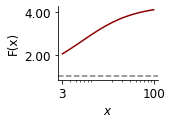

$\alpha=1.5,\omega=0.2,\gamma=1$


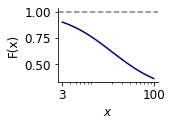

In [11]:
#using ndec=2 so that both plots have same 2 decimals in ticks and therefore same size

alpha=alphavals[0]
pars=[Kxc,Kpc,wc,Kt,alpha,beta,wo]
qs=[1,1,1,1]
title=r"$\alpha=%g,\omega=%g,\gamma=%g$"%(alpha,wc,gamma)
print(title)
title=None
plot_parset(pars,qs,title=title,color=colors_lines[0],figname=os.path.join(figsfolder,"fig2Cup.svg"),ndec=2,xrange=xrangelplot,xticks=xticks)
alpha=alphavals[1]
pars=[Kxc,Kpc,wc,Kt,alpha,beta,wo]
title=r"$\alpha=%g,\omega=%g,\gamma=%g$"%(alpha,wc,gamma)
print(title)
title=None
plot_parset(pars,qs,title=title,color=colors_lines[1],figname=os.path.join(figsfolder,"fig2Cdown.svg"),ndec=2,xrange=xrangelplot,xticks=xticks)

Supplementary Figures:

pars [0.1, 0.01, 0.3, 0.001, 15, 50, 0.3]
0.5006623866299805 0.5 1.9592622328110576 2.0


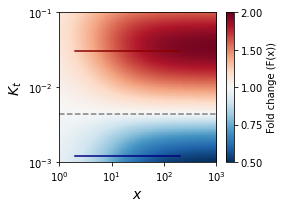

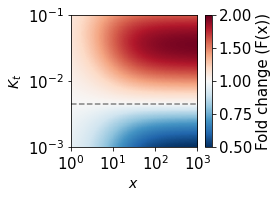

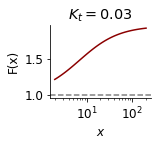

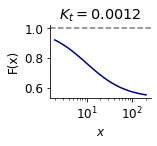

In [6]:
alpha=15
wc=0.3
gamma=1
wo=wc*gamma
q3=1
q4=1
q7=1
q8=1
xvals=np.logspace(0,3,100)
Ktvals=np.logspace(-3,-1,100)
xrangelplot=[np.log10(2),np.log10(200)]

out=np.zeros((len(Ktvals), len(xvals)))

for b, Kt_ in enumerate(Ktvals):
    
    pars=[Kxc,Kpc,wc,Kt_,alpha,beta,wo]
    if b==0:
        print("pars", pars)
    
    xval=0
    Ps=getPs(pars,xval)
    expr0=q3*Ps[2]+q4*Ps[3]+q7*Ps[6]+q8*Ps[7] 

    for x_,xval in enumerate(xvals):
        Ps=getPs(pars,xval)
        expr=q3*Ps[2]+q4*Ps[3]+q7*Ps[6]+q8*Ps[7] 
        out[b,x_]=expr/expr0
min_val_rounded=np.round(out.min(),1) #round minimum value to 1 decimal
max_val_rounded=np.round(out.max(),0) #round max value to 0 decimals
print(out.min(),min_val_rounded, out.max(),max_val_rounded)
#bGlist=[0.05,1,50]
for i in range(2):
    mpl.rcParams["font.size"]=15
    fig,ax=plt.subplots(1,1,figsize=(4,3)) 
    #ar=np.ma.masked_array(out,mask=out<1)
    norm=colors.TwoSlopeNorm(vmin=min_val_rounded, vcenter=1., vmax=max_val_rounded)
    extent=[np.log10(xvals[0]),np.log10(xvals[-1]),np.log10(Ktvals[0]),np.log10(Ktvals[-1])]
    im=ax.imshow(out,origin="lower",norm=norm,cmap=plt.cm.RdBu_r,extent=extent,aspect="auto")
    ax.contour(out,extent=extent,levels=[1],linestyles=["--"],colors=["gray"])
    ax.set_yticks([-2.5,-1.5,-0.5])
    colors_lines=["darkred","navy"]
    Ktlist=[0.03,0.0012]
    if i==0:
        for a,Kt in enumerate(Ktlist):
        #    print(bG)
            ax.plot(xrangelplot,[np.log10(Kt),np.log10(Kt)],linestyle="-",color=colors_lines[a])
    #ax.plot([0,0],[-1,1],linestyle=":",color="k")
    #ax.plot([1,1],[-1,1],linestyle=":",color="k")
        #ax.axhline(y=np.log10(bG),)
    #ax.set_xscale('log')
    ax.set_ylabel(r"$K_{t}$",size=14)
    ax.set_xlabel(r"$x$",size=14)
    ax.set_xticks([0,1,2,3])
    ax.set_xticklabels([r"$10^0$",r"$10^1$",r"$10^2$",r"$10^3$"])
    ax.set_yticks([-3,-2,-1])
    ax.set_yticklabels([r"$10^{-3}$",r"$10^{-2}$",r"$10^{-1}$"])
    ax.set_ylim(-3,-1)
    #if i==0:
    #    ax.set_title(r"$\alpha=%g,\omega=%g$"%(alpha,wc))
    #else:
    #    ax.set_title(r"$\alpha=%g,\omega=%g,\gamma=%g$"%(alpha,wc,gamma))
    below_one=np.linspace(min_val_rounded,1,3)
    above_one=np.linspace(1,max_val_rounded,3)
    bounds=np.concatenate((below_one,above_one[1:]))
    cbax=plt.colorbar(im,label="Fold change (F(x))",ax=ax,ticks=bounds)
    #cbax.set_label(label="fold change ($F(x)$)",size=12)
    #ax.axhline(y=1,linestyle="--",color="gray")
    #if title is not None:
    #    ax.set_title(title)
    plt.tight_layout()
    plt.savefig(os.path.join(figsfolder,"FigS1A_%d.pdf"%i),bbox_inches="tight")
    plt.savefig(os.path.join(figsfolder,"FigS1A_%d.svg"%i),bbox_inches="tight")
    plt.show()
mpl.rcParams["font.size"]=12
Kt=Ktlist[0]
pars=[Kxc,Kpc,wc,Kt,alpha,beta,wo]
qs=[1,1,1,1]
title=r"$K_t=%g$"%(Kt)
plot_parset(pars,qs,title=title,color=colors_lines[0],xrange=xrangelplot,figname=os.path.join(figsfolder,"figS1A_Kt_up.svg"))
Kt=Ktlist[1]
pars=[Kxc,Kpc,wc,Kt,alpha,beta,wo]
title=r"$K_t=%g$"%(Kt)
plot_parset(pars,qs,title=title,color=colors_lines[1],xrange=xrangelplot,figname=os.path.join(figsfolder,"figS1A_Kt_down.svg"))

[('Kxc', 0.1), ('Kpc', 0.01), ('wc', 2), ('Kt', 0.005), ('alpha', 5), ('beta', 50), ('wo', 2)]


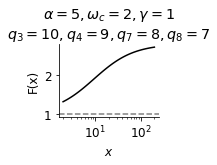

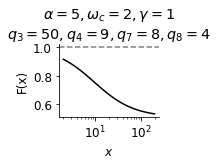

In [7]:
#effect of qs with alpha>1, w>1
Kt=0.005
wc=2
gamma=1
wo=wc*gamma
alpha=5
pars=[Kxc,Kpc,wc,Kt,alpha,beta,wo]
parnames="Kxc,Kpc,wc,Kt,alpha,beta,wo".split(",")
print(list(zip(parnames,pars)))
qs=[10,9,8,7]
q3,q4,q7,q8=qs
title=r"$\alpha=%g,\omega_c=%g,\gamma=%g$""\n"r"$q_3=%g, q_4=%g, q_7=%g, q_8=%g$"%(alpha,wc,gamma,q3,q4,q7,q8)
plot_parset(pars,qs,title=title,figname=os.path.join(figsfolder,"FigS1Bup.svg"),xrange=xrangelplot)

qs=[50,9,8,4]
q3,q4,q7,q8=qs
title=r"$\alpha=%g,\omega_c=%g,\gamma=%g$""\n"r"$q_3=%g, q_4=%g, q_7=%g, q_8=%g$"%(alpha,wc,gamma,q3,q4,q7,q8)
plot_parset(pars,qs,title=title,figname=os.path.join(figsfolder,"FigS1Bdown.svg"),xrange=xrangelplot)

1.2
[('Kxc', 0.1), ('Kpc', 0.01), ('wc', 2), ('Kt', 0.1), ('alpha', 2), ('beta', 20), ('wo', 1.2)]


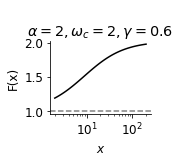

0.02


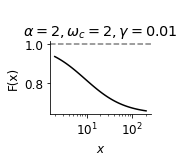

In [8]:
#effect of wc>wo with alpha>1, qs=1
Kxc=0.1
Kpc=0.01
beta=20
Kt=0.1

wc=2
alpha=2

gamma=0.6
wo=gamma*wc
print(wo)
pars=[Kxc,Kpc,wc,Kt,alpha,beta,wo]
parnames="Kxc,Kpc,wc,Kt,alpha,beta,wo".split(",")
print(list(zip(parnames,pars)))
qs=[1,1,1,1]
title="\n"r"$\alpha=%g,\omega_c=%g,\gamma=%g$"%(alpha,wc,gamma)
plot_parset(pars,qs,title=title,figname=os.path.join(figsfolder,"FigS1Cup.svg"),xrange=xrangelplot)


gamma=0.01
wo=gamma*wc
print(wo)
pars=[Kxc,Kpc,wc,Kt,alpha,beta,wo]
qs=[1,1,1,1]
title="\n"r"$\alpha=%g,\omega_c=%g,\gamma=%g$"%(alpha,wc,gamma)
plot_parset(pars,qs,title=title,figname=os.path.join(figsfolder,"FigS1Cdown.svg"),xrange=xrangelplot)



#qs=[100,9,8,7]
#title=r"$\alpha=%g,\omega_c=%g,\omega_o=%g$"%(alpha,wc,wo)
#plot_parset(pars,qs,title=title,figname=None)

#In the case where alpha<1, omega<1, gamma<1, q_i<=1, can we still get activation? (this shows that the order of the q_i matter to ensure repression).

257 [379.27901502936544, 69.17305310607114, 0.1892741997592207, 0.9156877675624614, 0.002640753519967984, 78.39827106708854, 0.0017783152239115958]


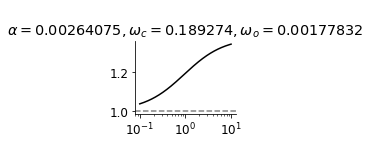

482 [157.21736415815946, 548.0313639467646, 0.5402003588208127, 0.9353528909478849, 0.0027735283454537215, 165.966589642723, 0.0012299466809231937]


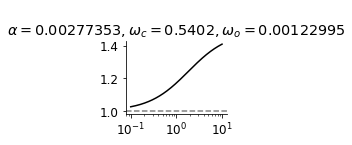

666 [15.94493419149915, 116.17691960319806, 0.7151116814149221, 0.8019617380936139, 0.0010917157883590192, 107.039237770907, 0.012449071712825511]


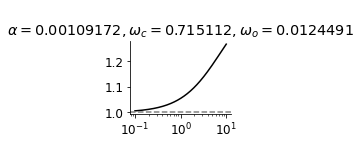

780 [24.818250548980416, 96.64544243315436, 0.7942437993400779, 1.3801814394421015, 0.004141466671073347, 7.167176926105504, 0.001349190569823635]


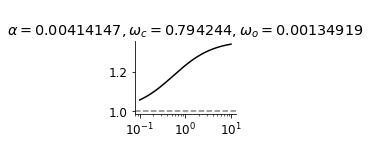

794 [106.67943246953251, 873.4341082526914, 0.23305632658423903, 2.0070739595568146, 0.1749830573838295, 54.26487743215932, 0.0008263381440319567]


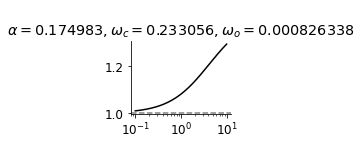

In [80]:
for i in range(1000):
    np.random.seed(i)
    #print(i)
    Kxc=10**np.random.uniform(-3,3)
    Kpc=10**np.random.uniform(-3,3)
    beta=10**np.random.uniform(0,3)
    Kt=10**np.random.uniform(-3,0.99)
    wc=10**np.random.uniform(-3,0)
    alpha=10**np.random.uniform(-3,0)
    gamma=10**np.random.uniform(-3,0)

    
    wo=gamma*wc
    pars=[Kxc,Kpc,wc,Kt,alpha,beta,wo]
    qs=[4,3,2,1]
    title="\n"r"$\alpha=%g,\omega_c=%g,\omega_o=%g$"%(alpha,wc,wo)
    vals=plot_parset(pars,qs,title=title,figname=None,returnonly=True) #os.path.join(figsfolder,"Fig1suppl1Dup.svg"))
    if vals[-1]/vals[0]>1.25:
        print(i, pars)
        plot_parset(pars,qs,title=title,figname=None,returnonly=False)
        
